In [ ]:
def fps(f):
    from time import perf_counter
    start = perf_counter()
    res = f()
    end = perf_counter()
    print(f"FPS: {1/(end-start):.2f}")
    return res

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('fullbody.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
from model_utils import HaarCascadeDetector
from constants import HAARCASCADE_FULLBODY_OPTIONS

detector = HaarCascadeDetector("detectors/fullbody_cascade.xml", HAARCASCADE_FULLBODY_OPTIONS)
bboxes = fps(lambda: detector.detect(img))

1080 1920


ffmpeg version 4.4.4-0ubuntu1~22.04.sav1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.4.0-1ubuntu1~22.04)
  configuration: --prefix=/usr --extra-version='0ubuntu1~22.04.sav1.1' --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enabl

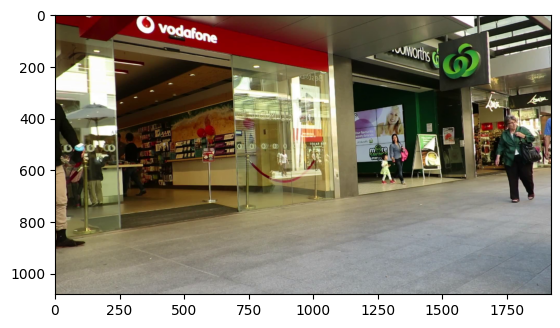

In [151]:
import ffmpeg
import subprocess
import numpy as np
filename = 'benchmarking/mot/MOT17/mot17-09-sdp.mp4'
args = ffmpeg.input(filename).output("pipe:", format='rawvideo', pix_fmt='rgb24').compile()
p = subprocess.Popen(args, stdout=subprocess.PIPE)

h, w = 1080, 1920
print(h, w)
def read_frame(p):
    frame = p.stdout.read(h * w *3)
    if len(frame) == 0:
        return None
    return np.frombuffer(frame, dtype='uint8').reshape((h, w, 3))

frames = []
for _ in range(100):
    frames.append(read_frame(p).copy())
plt.imshow(frames[0])

In [152]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

FPS: 2.15


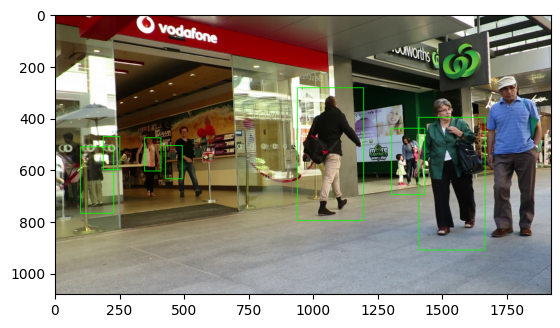

In [158]:
frame_copy = frames[90].copy()
bboxes = fps(lambda: hog.detectMultiScale(frame_copy, winStride=(4, 4), padding=(0,0), scale=2)[0])
for bbox in bboxes:
    x, y, w, h = bbox

    cv2.rectangle(frame_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(frame_copy)

In [145]:
!ffmpeg -y -framerate 25 -pattern_type glob -i 'benchmarking/mot/MOT20Det/test/MOT20-07/img1/*.jpg' -c:v libx264 -pix_fmt yuv420p 'benchmarking/mot/MOT20Det/mot20-07.mp4'

ffmpeg version 4.4.4-0ubuntu1~22.04.sav1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.4.0-1ubuntu1~22.04)
  configuration: --prefix=/usr --extra-version='0ubuntu1~22.04.sav1.1' --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enabl